### Student Information
Name:黃麟凱

Student ID:109062607

GitHub ID:vbblackapple

Kaggle name:KAI

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [2]:
import pandas as pd
import numpy as np

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)


### ** >>> Exercise 1 (Take home): **  

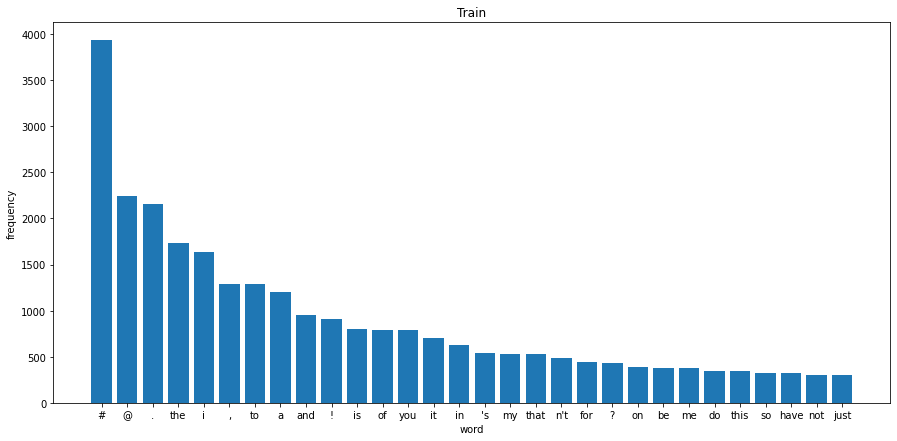

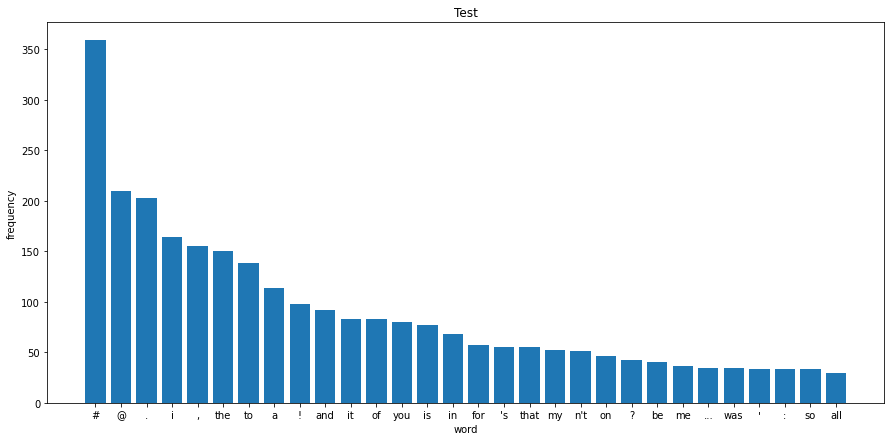

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

count_vect = CountVectorizer(max_features=30, tokenizer=nltk.word_tokenize)

#find out top 30 data in frequency and plot them
def plot_top_30(a_df,name):
    X_counts = count_vect.fit_transform(a_df.text)
    top_30_value = np.sum(X_counts.toarray(),axis=0)
    top_30 = {key:value for key,value in zip(count_vect.get_feature_names(), top_30_value)}
    top_30 = {k: v for k, v in sorted(top_30.items(), key=lambda item: item[1],reverse=True)}
    plt.figure(figsize=(15, 7))
    plt.bar(top_30.keys(),top_30.values())
    plt.title(name)
    plt.xlabel('word')
    plt.ylabel('frequency')

plot_top_30(train_df,'Train')
plot_top_30(test_df,'Test')

### ** >>> Exercise 2 (Take home): **

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#use TfidfVectorizer to produce the tfidf vector for each row
tfidfvectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidfvectorizer.fit(train_df['text'])
print(tfidfvectorizer.get_feature_names()[100:110])

/home/nlplab/jeff/anaconda3/envs/DM/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


### ** >>> Exercise 3 (Take home): **

The first column means there're 88(59+15+6+8) raws labeled "anger", but there're only 59 predicted as "anger", and there're 15 prdicted as "fear", 6 prdicted as "joy" and 8 prdicted as "sadness".  The grids on the diagonal means correct prediction and others are wrong. 

### ** >>> Exercise 4 (Take home): **

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#use nltk.word_tokenize to tokenize and produce words' frquency for top 500 word in frquency
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)


print('testing accuracy: {}'.format(round(acc_test, 2)))

testing accuracy: 0.69


### ** >>> Exercise 5 (Take home): **

Naive Bayes is a little better than Decision Tree. However, decision tree is easilier to explain the classification result and reason. In addition, naive bayes is needed to be used under the assumption: class conditional independence.

### ** >>> Exercise 6 (Take home): **

In [7]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

# encode and decode labels between a word and one hot
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 193us/step - loss: 1.3292 - accuracy: 0.3720 - val_loss: 1.2852 - val_accuracy: 0.4323
Epoch 2/25
3613/3613 [==============================] - 0s 103us/step - loss: 1.0055 - accuracy: 0.6421 - val_loss: 0.9244 - val_accuracy: 0.6657
Epoch 3/25
3613/3613 [==============================] - 0s 106us/step - loss: 0.5943 - accuracy: 0.7919 - val_loss: 0.7870 - val_accuracy: 0.7089
Epoch 4/25
3613/3613 [==============================] - 0s 103us/step - loss: 0.4198 - accuracy: 0.8461 - val_loss: 0.8023 - val_accuracy: 0.6830
Epoch 5/25
3613/3613 [==============================] - 0s 105us/step - loss: 0.3334 - accuracy: 0.8727 - val_loss: 0.8615 - val_accuracy: 0.7118
Epoch 6/25
3613/3613 [==============================] - 0s 106us/step - loss: 0.2668 - accuracy: 0.9112 - val_loss: 0.8957 - val_accuracy: 0.

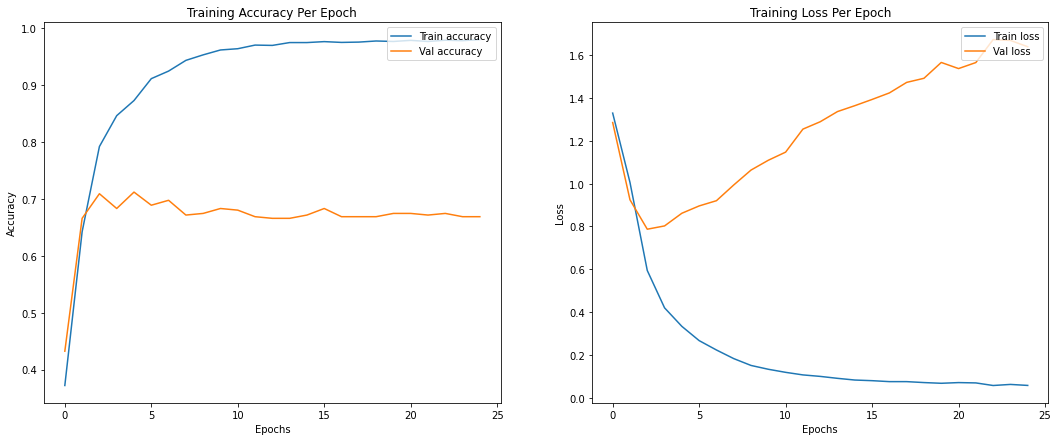

In [8]:
#use plot to draw the accuracy and loss change along with epoch  
epoch_ls = training_log['epoch']
fig = plt.figure(figsize = (18,7))
ax = fig.add_subplot(121)
ax.plot(epoch_ls, training_log['accuracy'], label="Train accuracy")
ax.plot(epoch_ls, training_log['val_accuracy'], label="Val accuracy")
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.title.set_text('Training Accuracy Per Epoch')
plt.legend(loc='upper right')
ax = fig.add_subplot(122)
ax.plot(epoch_ls, training_log['loss'], label="Train loss")
ax.plot(epoch_ls, training_log['val_loss'], label="Val loss")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend(loc='upper right')
ax.title.set_text('Training Loss Per Epoch')

From the third epoch, the model start to overfit, because the loss of training drops and the loss of validation ascents after after the third epoch. Also because the acurracy of training ascents, and the accuracy of validation drops after the third epoch, the model overfit from the third epoch.

### ** >>> Exercise 7 (Take home): **

There is a common, easy and mediocre way I had used: average all words' embedding in a sentence and use this vecor as sentence embedding.

### ** >>> Exercise 8 (Take home): **

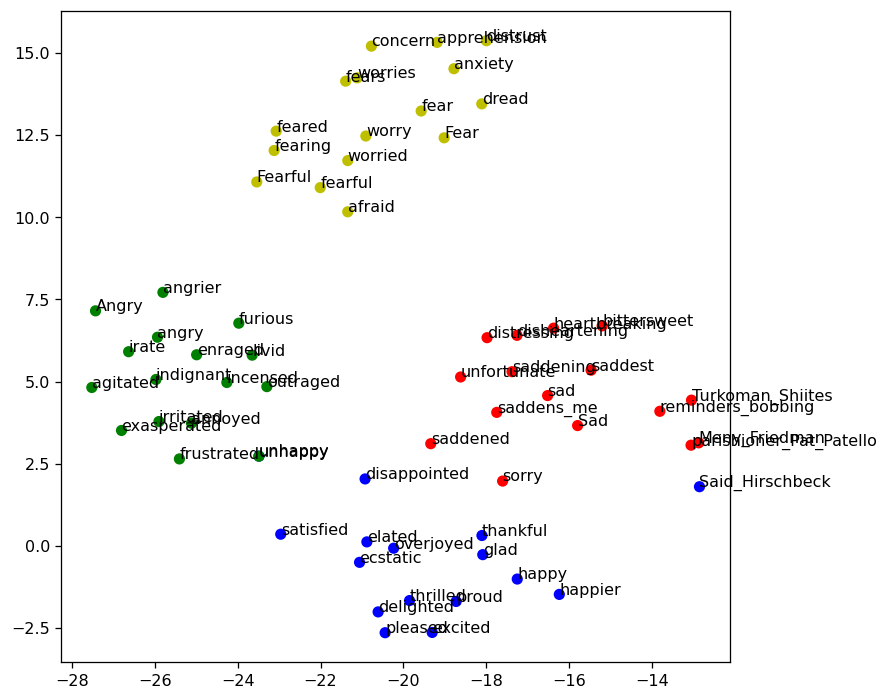

In [9]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)


word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()